In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data = pd.read_csv("gld_price_data.csv")

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
data.shape

(2290, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation = data.corr(numeric_only=True)

<Axes: >

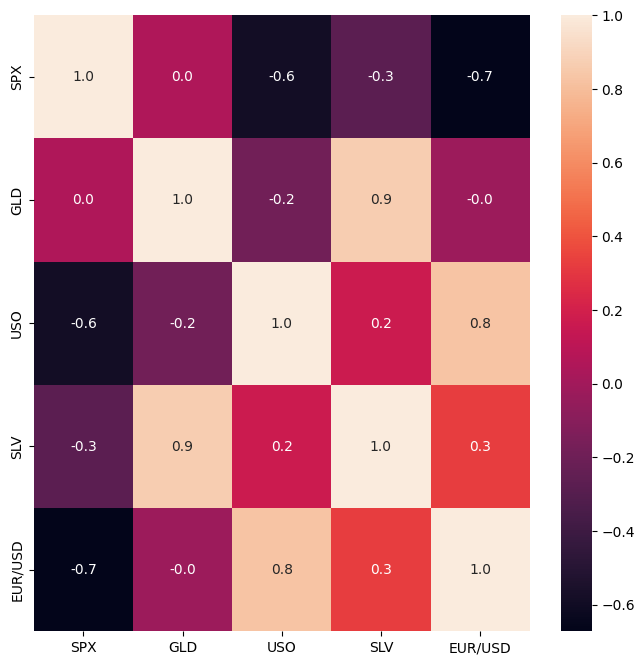

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, annot=True
            # square=True, fmt='.1f', annot_kws={'size':8}, cmap='Blues'
           )

In [24]:
print(correlation['GLD']) #correlation values of GLD

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_16132\1673639736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

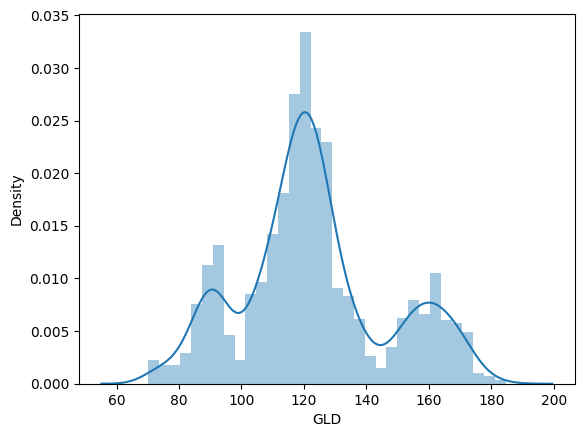

In [26]:
sns.distplot(data['GLD'])

In [28]:
X = data.drop(['Date','GLD'], axis=1)
Y = data['GLD']

In [29]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [30]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [32]:
#model training by random forest regressor
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [34]:
test_data_prediction = regressor.predict(X_test)

In [36]:
test_data_prediction

array([168.4388991 ,  82.09899993, 116.15620035, 127.57120079,
       120.49240084, 154.48709684, 150.35989861, 126.08469992,
       117.53579883, 125.9689009 , 116.5271009 , 171.41160078,
       141.6914986 , 167.73199842, 115.22810033, 117.53630044,
       141.240502  , 170.30710089, 159.89600347, 159.73279868,
       154.87730006, 125.02089984, 175.63249961, 157.29390398,
       125.18370047,  94.13109965,  77.08290031, 120.75000037,
       119.07559912, 167.40099973,  88.12390044, 125.28460005,
        91.09280089, 117.65910026, 121.13459902, 135.63229953,
       115.60800108, 114.85180101, 148.73619983, 107.2348011 ,
       104.33980244,  87.28909794, 126.48380033, 117.92219982,
       153.17629919, 119.54979996, 108.38500014, 108.12039854,
        93.21790018, 127.19759738,  74.8464007 , 113.71369932,
       121.2024002 , 111.34619925, 118.90419906, 120.55669922,
       159.29989957, 167.1622008 , 147.05649653,  85.75949881,
        94.20600023,  86.82559932,  90.60869999, 118.90

In [37]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895404116605161


In [38]:
#comparing actual values and predicted values by using plot
Y_test = list(Y_test)

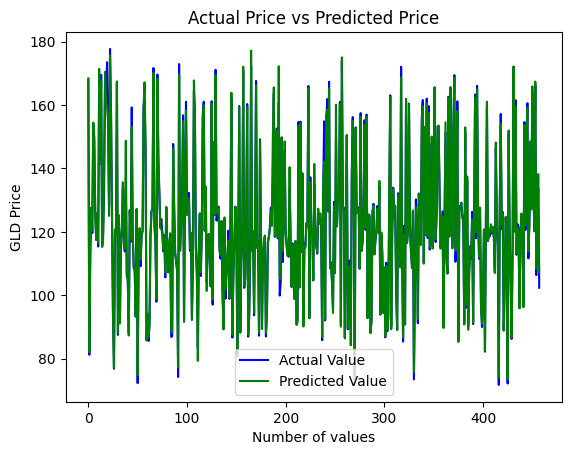

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()